In [28]:
import re
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import pearsonr
from datetime import datetime
import seaborn as sns
import sys
sys.path.append('../')
from helpers import *
from analysis_helper import *

data_path = './../../../data'

In [29]:
rb_dir = os.path.join(data_path, 'RateBeer')
exp_categories = get_exp_categories(data_path) + ['expertness_score']
rev_with_scores_rb = pd.read_pickle(os.path.join(rb_dir, 'rev_w_scores.pkl'))
rev_with_scores_rb['date'] = pd.to_datetime(rev_with_scores_rb['date'])
beers_rb = pd.read_csv(os.path.join(rb_dir, 'beers.csv'))
users = pd.read_csv(os.path.join(rb_dir, 'users_RB_clean.csv'))

In [3]:
beer_min_max = get_min_max_for_beers(rev_with_scores_rb, exp_categories)


In [5]:
rev_with_scores_rb.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance_rt', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'review', 'lang_tag', 'stems', 'flavor',
       'mouthfeel', 'brewing', 'technical', 'appearance', 'off_flavors',
       'expertness_score'],
      dtype='object')

In [3]:

scores_for_beer = get_scores_for_beers(rev_with_scores_rb, exp_categories)


In [6]:
scores_for_beer

review_count    flavor           mouthfeel             brewing  \
               count      mean       std      mean       std      mean   
beer_id                                                                  
1               1035  1.858937  1.740796  1.711111  1.420567  0.410628   
2                909  1.452145  1.474141  0.981298  1.148012  0.739274   
3                676  1.963018  1.865109  1.093195  1.241939  0.832840   
4                425  2.075294  1.788057  1.049412  1.179585  0.887059   
5                562  2.556940  2.058277  1.217082  1.310533  0.882562   
...              ...       ...       ...       ...       ...       ...   
536430             2  4.500000  0.707107  0.500000  0.707107  0.000000   
536431             3  3.333333  1.527525  1.666667  2.081666  0.333333   
536456             5  2.400000  0.547723  1.200000  1.303840  0.200000   
536465             2  3.500000  2.121320  0.000000  0.000000  0.500000   
536467             2  3.500000  0.707107  1.500000  2.121320  0.500000   

                  technical           appearance           off_flavors  \
              std      mean       std       mean       std        mean   
beer_id                                                                  
1        0.606607  0.571981  0.854721   1.163285  1.232775    0.101449   
2        0.808278  0.595160  0.854516   1.427943  1.223184    0.171617   
3        0.852109  0.807692  0.982061   1.449704  1.217946    0.218935   
4        0.827845  0.738824  0.905967   1.609412  1.256270    0.225882   
5        0.829760  0.679715  0.931092   1.829181  1.370430    0.229537   
...           ...       ...       ...        ...       ...         ...   
536430   0.000000  0.500000  0.707107   2.000000  1.414214    0.000000   
536431   0.577350  0.666667  0.577350   0.666667  0.577350    0.000000   
536456   0.447214  0.400000  0.547723   1.800000  1.303840    0.200000   
536465   0.707107  0.500000  0.707107   0.500000  0.707107    0.000000   
536467   0.707107  1.000000  0.000000   1.000000  0.000000    0.000000   

                  expertness_score            
              std             mean       std  
beer_id                                       
1        0.352317         5.817391  4.433311  
2        0.458915         5.367437  3.828550  
3        0.483196         6.365385  4.287233  
4        0.537103         6.585882  4.031455  
5        0.502027         7.395018  4.506740  
...           ...              ...       ...  
536430   0.000000         7.500000  0.707107  
536431   0.000000         6.666667  3.511885  
536456   0.447214         6.200000  2.167948  
536465   0.000000         5.000000  1.414214  
536467   0.000000         7.500000  3.535534  

[277840 rows x 15 columns]

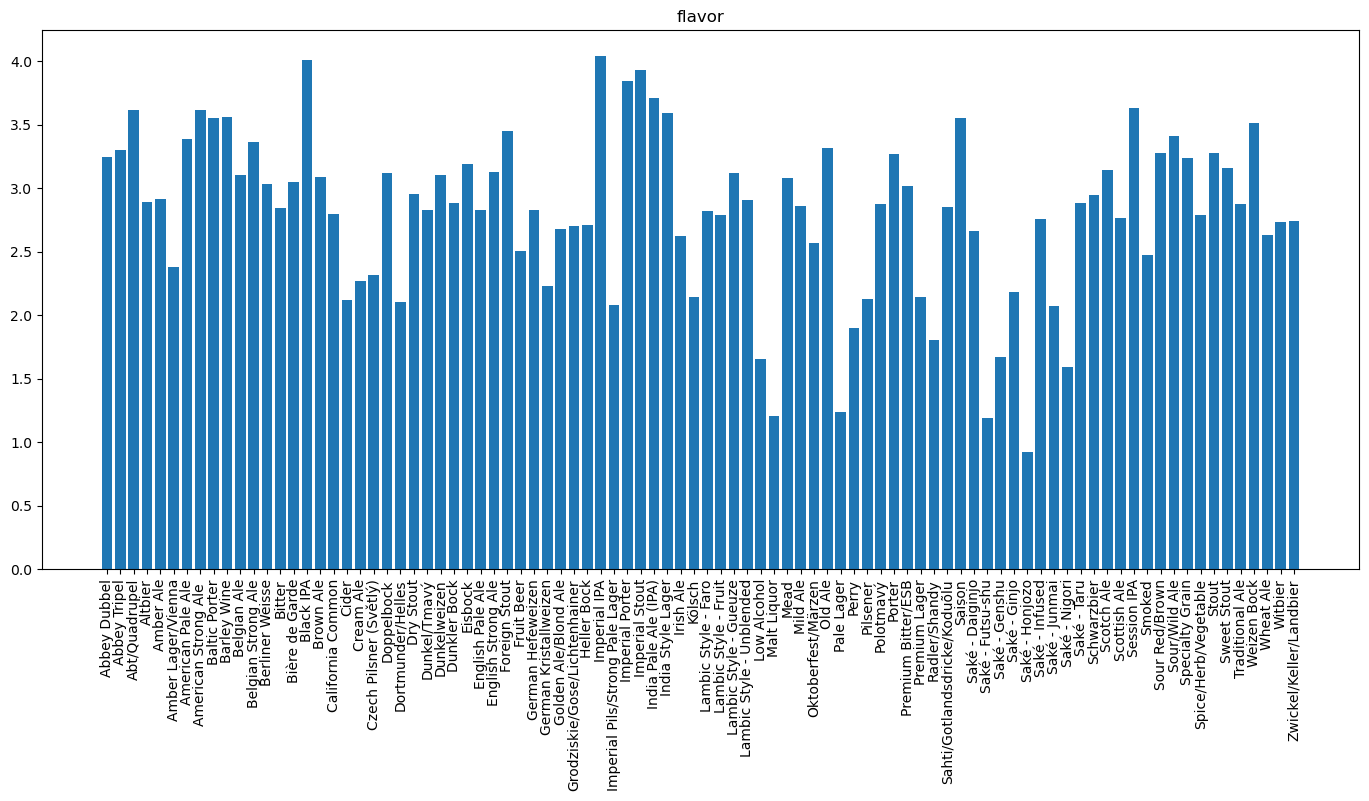

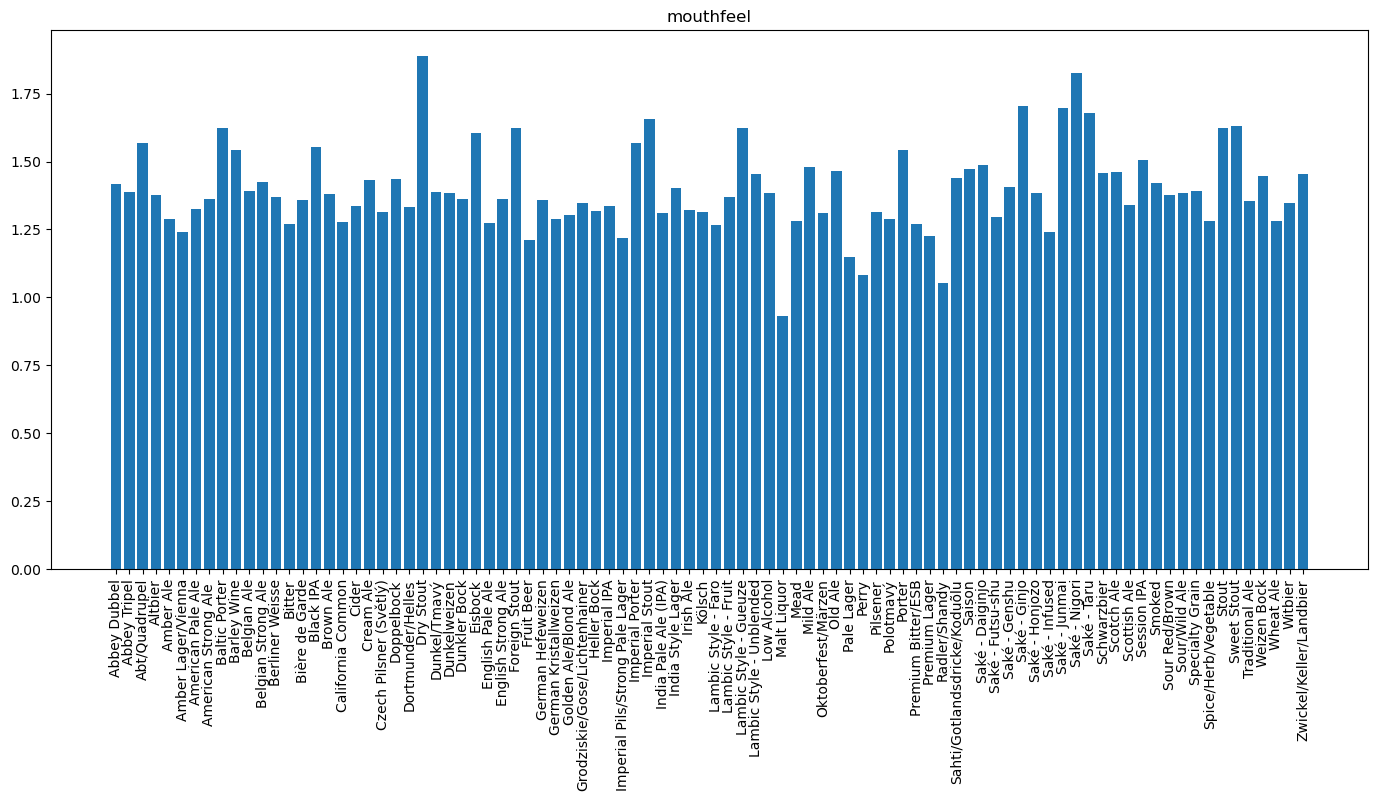

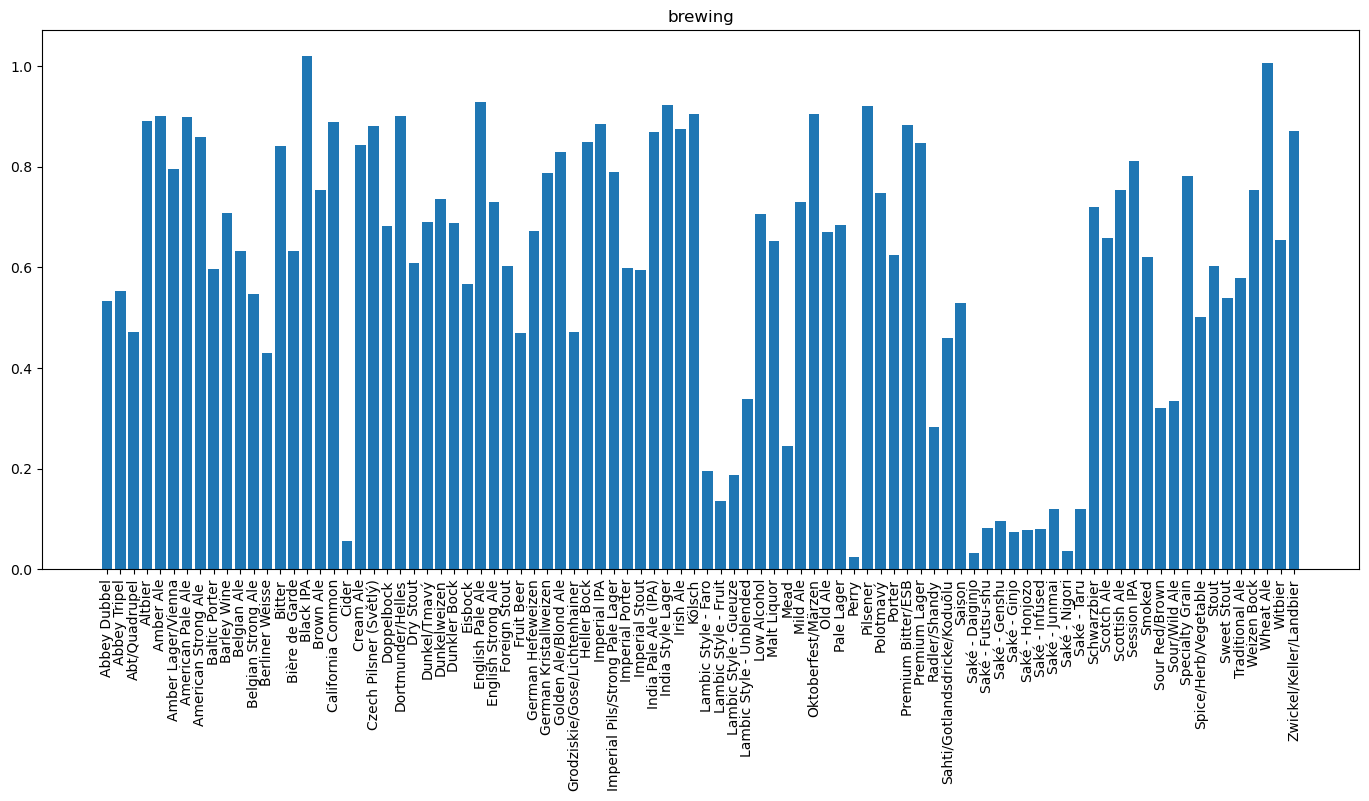

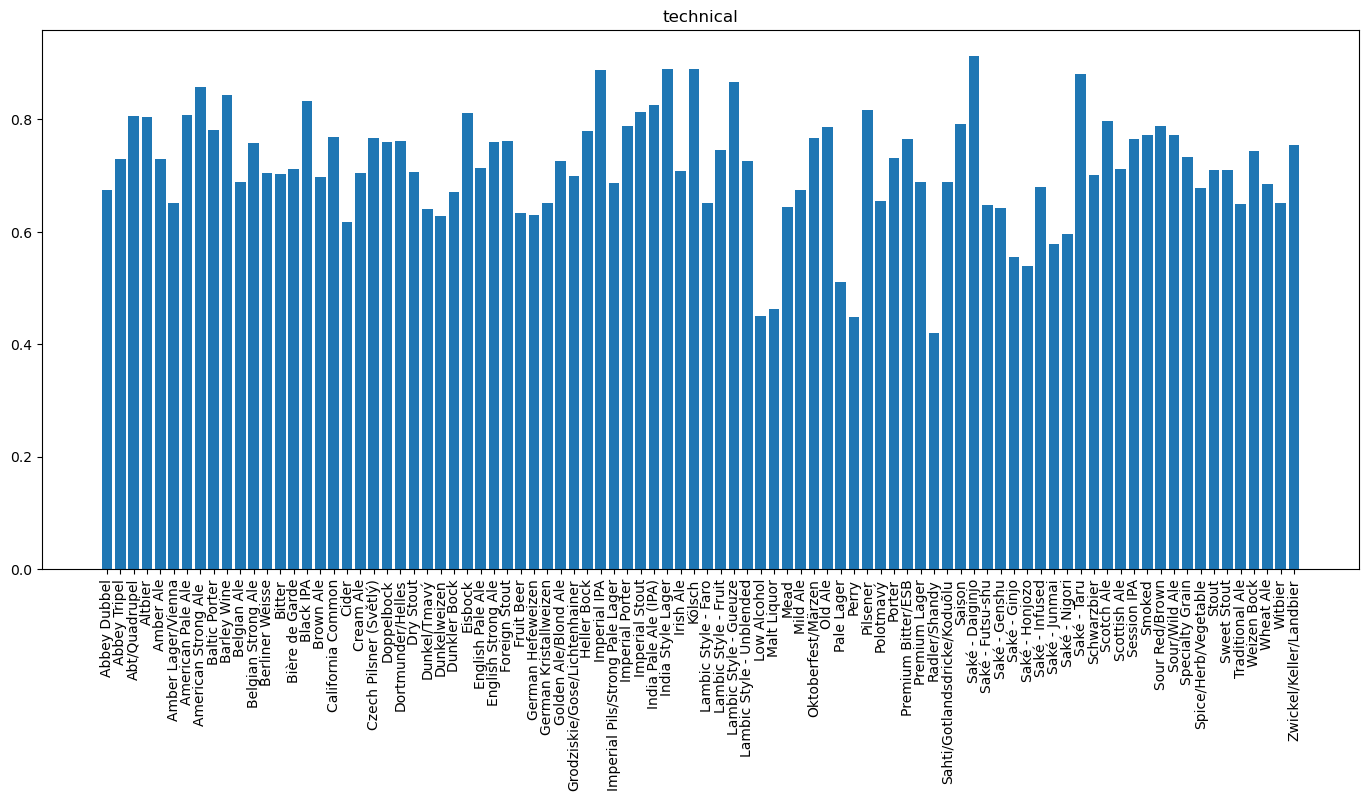

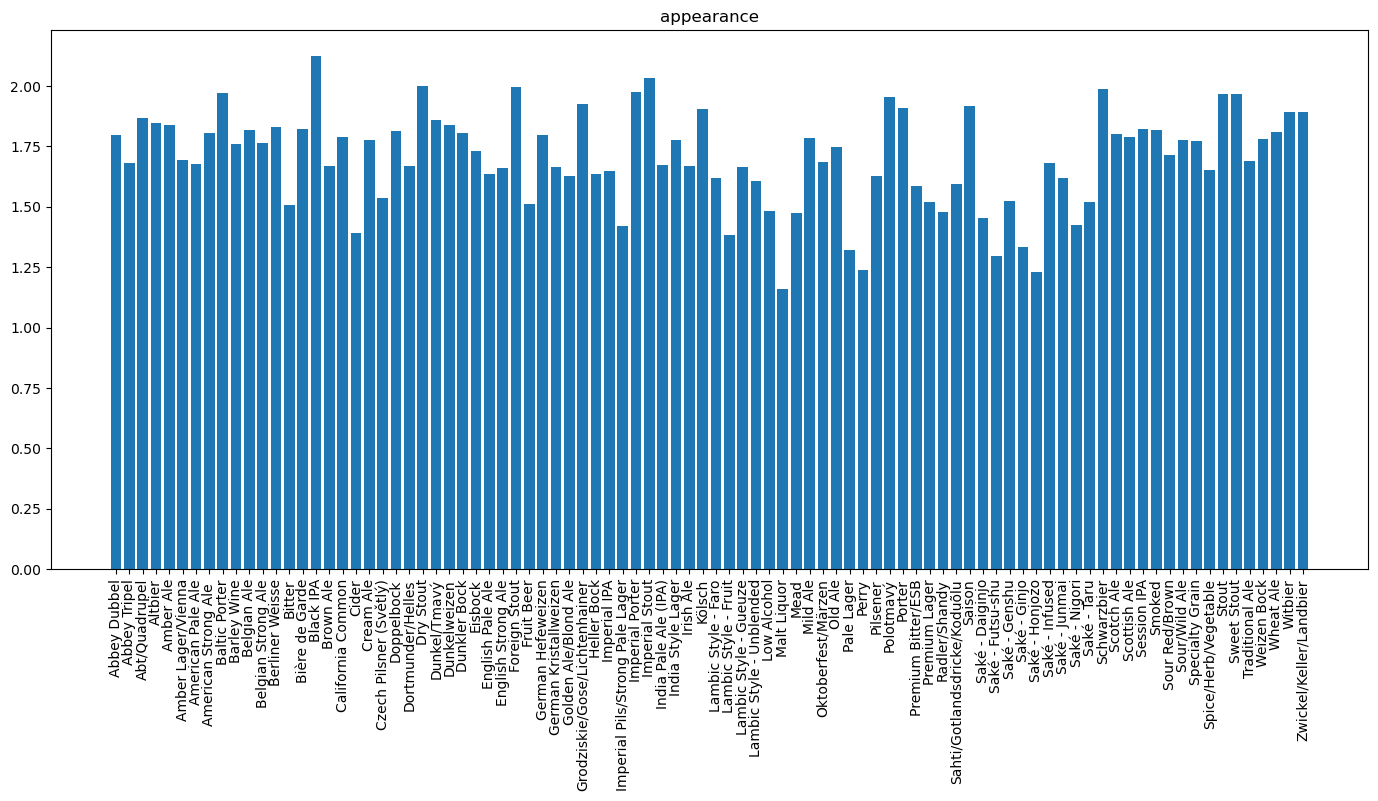

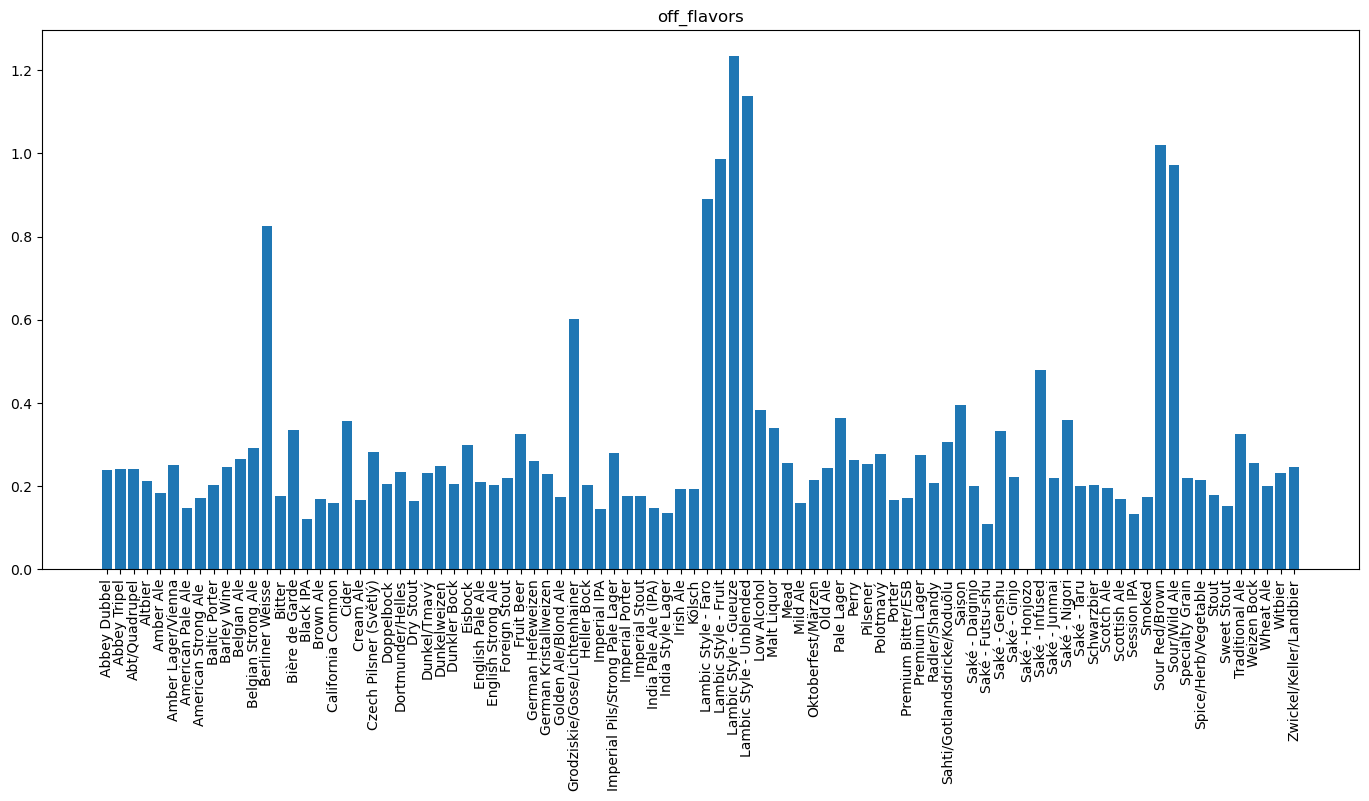

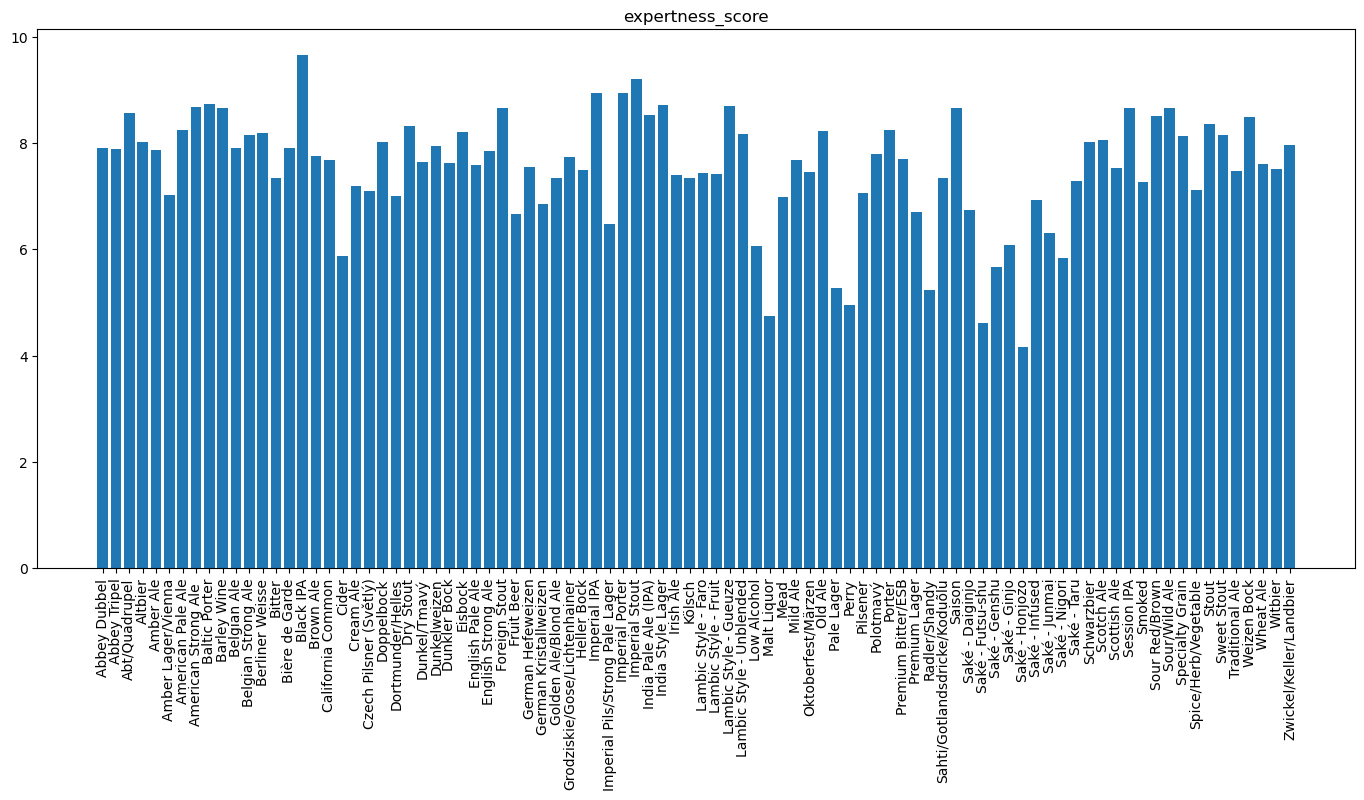

In [3]:
mean_scores_beer = get_mean_scores_beer(rev_with_scores_rb, exp_categories)
complete_beer = pd.merge(beers_rb, mean_scores_beer[mean_scores_beer['review_count']>=10], on='beer_id')
beer_gr =  get_beer_gr(complete_beer, exp_categories)
for col in exp_categories:    
    fig  = plt.figure(figsize=(17,7))
    plt.bar(beer_gr.index, beer_gr[col])
    plt.title(col)

    plt.xticks(rotation=90)
    plt.show()

In [13]:
col = 'brewing'
beer_gr.loc[beer_gr[col].idxmax():beer_gr[col].idxmax()]
beer_gr.loc[beer_gr[col].nlargest(2).idxmin():beer_gr[col].nlargest(2).idxmin()]

flavor  mouthfeel   brewing  technical  appearance  off_flavors  \
style                                                                          
Wheat Ale  2.631302    1.28215  1.006495   0.685702    1.808869     0.199673   

           expertness_score  
style                        
Wheat Ale           7.61419

In [14]:
beer_max = pd.DataFrame()
for col in exp_categories:
    if col =='expertness_score':
        continue
    if col == 'brewing':
        beer_max = pd.concat([beer_max, beer_gr.loc[beer_gr[col].nlargest(2).idxmin():beer_gr[col].nlargest(2).idxmin()]])
    else:
        beer_max = pd.concat([beer_max, beer_gr.loc[beer_gr[col].idxmax():beer_gr[col].idxmax()]])
normalized_beer_max = beer_max / beer_gr.max()
normalized_beer_max = normalized_beer_max.drop(columns='expertness_score')

In [15]:
normalized_beer_max

flavor  mouthfeel   brewing  technical  appearance  \
style                                                                         
Imperial IPA           1.000000   0.708071  0.867181   0.973118    0.776211   
Dry Stout              0.730117   1.000000  0.596788   0.773369    0.940401   
Wheat Ale              0.651063   0.678688  0.986096   0.750907    0.851209   
Saké - Daiginjo        0.658340   0.787014  0.031509   1.000000    0.683524   
Black IPA              0.991778   0.821487  1.000000   0.911784    1.000000   
Lambic Style - Gueuze  0.771975   0.859892  0.182686   0.948240    0.783835   

                       off_flavors  
style                               
Imperial IPA              0.117286  
Dry Stout                 0.132076  
Wheat Ale                 0.161694  
Saké - Daiginjo           0.162095  
Black IPA                 0.098296  
Lambic Style - Gueuze     1.000000

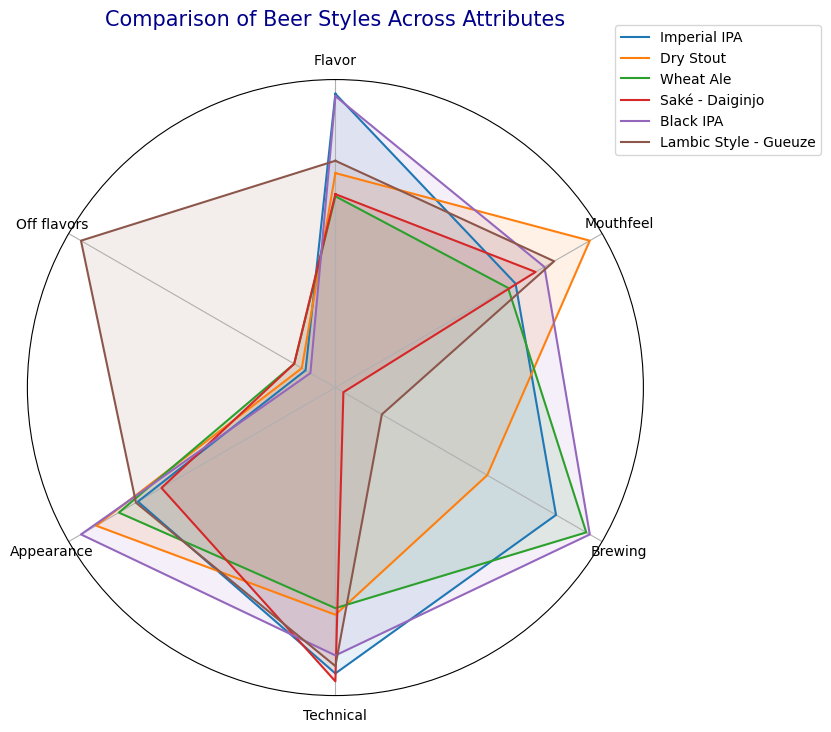

In [16]:
# Categories for radar chart
categories = ["Flavor", "Mouthfeel", "Brewing", "Technical", "Appearance", "Off flavors"]
num_vars = len(categories)

# Set up radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Function to plot a radar chart
def plot_radar_chart(df, categories, title):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one beer style per loop
    for beer in df.index:
        values = df.loc[beer].tolist()  # Get the values for the beer style
        values += values[:1]  # Complete the loop for each beer style
        ax.plot(angles, values, label=beer)
        ax.fill(angles, values, alpha=0.1)

    # Add labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.yaxis.set_visible(False)

    # Add title and legend
    plt.title(title, size=15, color='darkblue', pad=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Generate radar chart
plot_radar_chart(normalized_beer_max, categories, "Comparison of Beer Styles Across Attributes")


In [6]:
mean_scores_beer = get_mean_scores_beer(rev_with_scores_rb, exp_categories)
complete_beer = pd.merge(beers_rb, mean_scores_beer, on='beer_id')

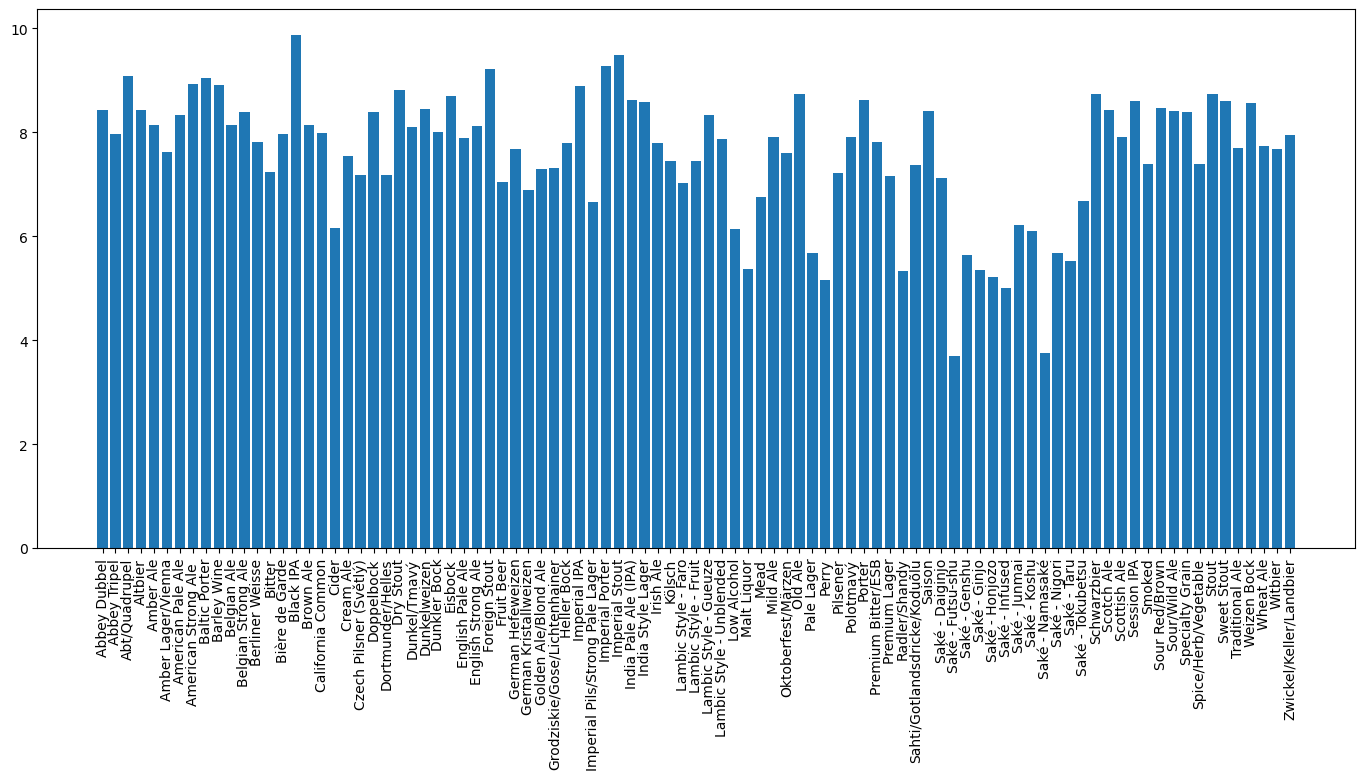

In [7]:
beer_gr = get_beer_gr(complete_beer, exp_categories)
fig  = plt.figure(figsize=(17,7))
plt.bar(beer_gr.index, beer_gr['expertness_score'])

plt.xticks(rotation=90)
plt.show()

In [8]:
mean_scores_beer['review_count'].corr(mean_scores_beer['expertness_score'])

-0.012310210627004058

<Axes: >

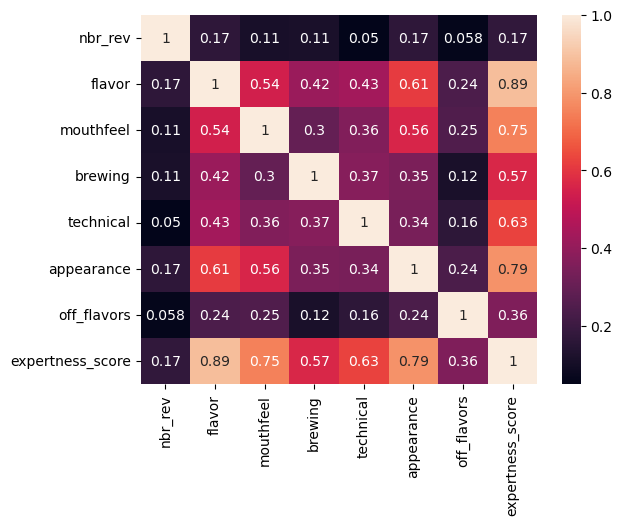

In [9]:
user_rb = get_users_stats(rev_with_scores_rb, exp_categories, user_id='user_name')
sns.heatmap(user_rb.corr(), annot=True)

<Axes: >

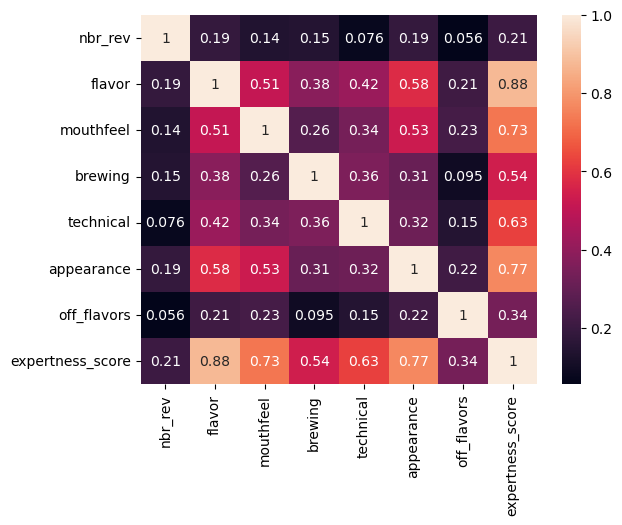

In [10]:
sns.heatmap(user_rb[user_rb['nbr_rev']<200].corr(), annot=True)

In [11]:
pearsonr(user_rb['expertness_score'], user_rb['nbr_rev'])

PearsonRResult(statistic=0.1727353234241635, pvalue=0.0)

In [12]:
# Normalizes review dates to the first review date for each user, setting their first review as day zero.
rev_zero_date= joined_date_zero(rev_with_scores_rb, user_id='user_name')
# Standardize the reviews score through the mean and the std of the scores for that particular beer 
rev_std = standardize(rev_zero_date, scores_for_beer.reset_index(), exp_categories)

result = rev_std.groupby('user_name').apply(corr_and_count, include_groups=False)

result = result.dropna()
result

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pe

correlation   p_value  total_count
user_name                                        
000pete1983      -0.248472  0.634962          6.0
007lund          -0.140849  0.218697         78.0
00cobraR         -0.093262  0.004378        932.0
00german00       -0.537930  0.108738         10.0
0110x011          0.037179  0.899588         14.0
...                    ...       ...          ...
zygomatic99      -0.017632  0.952294         14.0
zymosis          -0.153274  0.570898         16.0
zyster99          0.063262  0.822773         15.0
zywiecporter     -0.127917  0.742937          9.0
Ãminnishegri     0.558327  0.441673          4.0

[33626 rows x 3 columns]

In [13]:
result[(result['total_count'] > 20) & (result['total_count'] < 500)]['correlation'].mean()

0.020905817366025967

In [14]:
result['correlation'].mean()

0.015519406207463077

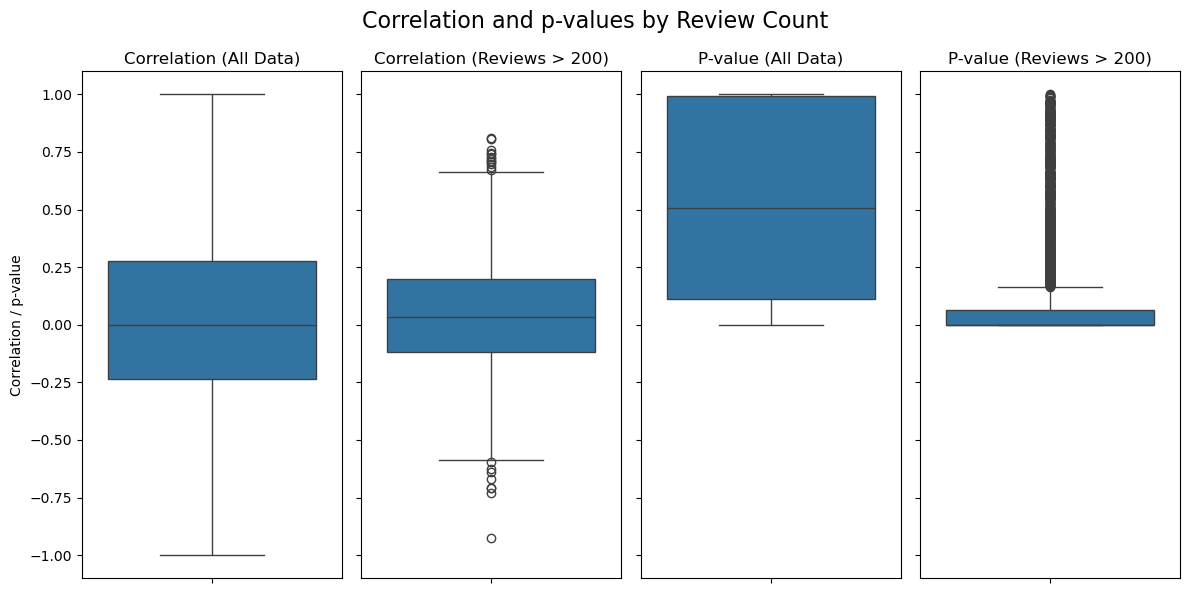

In [15]:
plot_corr_and_pvalue(result)

In [16]:
len(users[users['nbr_ratings']>200])

4425

In [18]:
rev_of_exp = review_of_experts(rev_with_scores_rb, users, user_id='user_name', nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, user_id='user_name', max=100)
rev_exp_zero_date= joined_date_zero(rev_of_exp, user_id='user_name')

rev_exp_std = standardize(rev_exp_zero_date, scores_for_beer.reset_index(), exp_categories)
result = rev_exp_std.groupby('user_name').apply(corr_and_count, include_groups=False)

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pe

In [19]:
result = result.dropna()

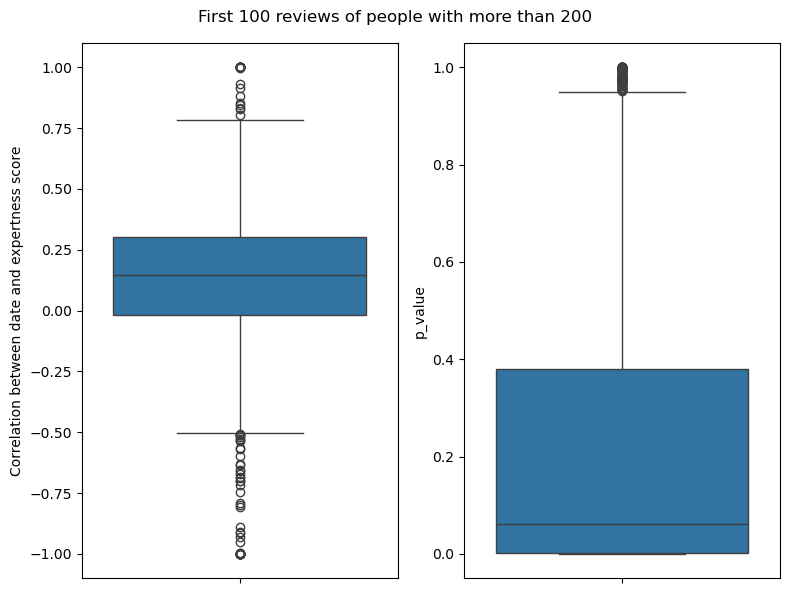

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6)) 

fig.suptitle('First 100 reviews of people with more than 200')

sns.boxplot(y=result['correlation'], ax=axes[0])

axes[0].set_ylabel("Correlation between date and expertness score")

sns.boxplot(y=result['p_value'], ax=axes[1])
axes[1].set_ylabel("p_value")

plt.tight_layout()  
plt.show()


In [21]:
result['correlation'].mean()

0.13605246020681802

In [ ]:
rev_of_exp = review_of_experts(rev_with_scores_rb, users, user_id='user_name', nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, user_id='user_name', max=5)

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


Text(0.5, 1.0, 'Mean of the score (standardized) of the first 5 reviews of people with more than 200')

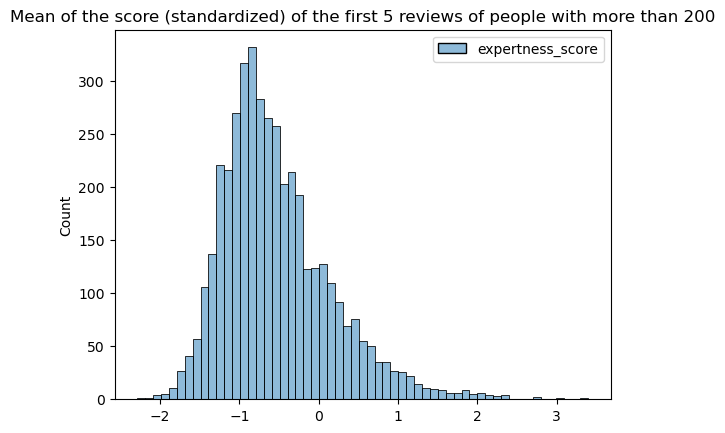

In [23]:
rev_exp_std = standardize(rev_of_exp, scores_for_beer.reset_index(), exp_categories)
rev_exp_std_grouped = rev_exp_std.groupby('user_name')[['expertness_score']].agg('mean')
sns.histplot(rev_exp_std_grouped)
plt.title('Mean of the score (standardized) of the first 5 reviews of people with more than 200')

In [24]:
no_already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score']<-0.5].index

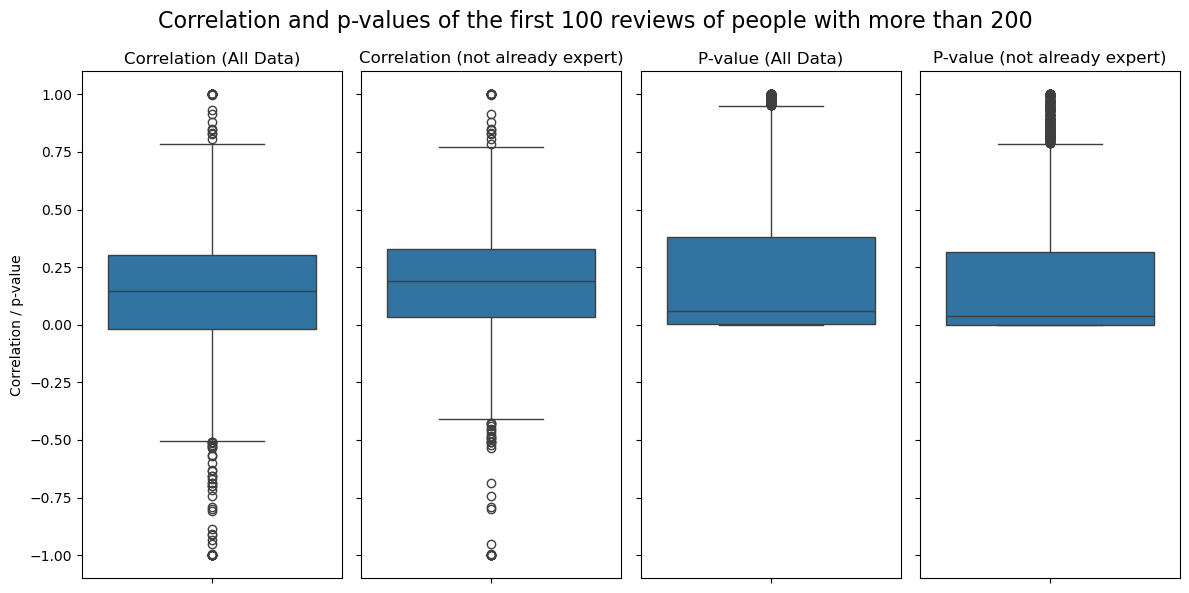

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 

fig.suptitle("Correlation and p-values of the first 100 reviews of people with more than 200", fontsize=16)
sns.boxplot(y=result['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result[result.index.isin(no_already_experts)]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result[result.index.isin(no_already_experts)]['p_value'], ax=axes[3])
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [26]:
result[result.index.isin(no_already_experts)].correlation.mean()

0.1790060779377274

In [27]:
result[result.index.isin(no_already_experts)].p_value.describe()

count    2.484000e+03
mean     2.005014e-01
std      2.852197e-01
min      2.067706e-26
25%      8.056928e-04
50%      3.909731e-02
75%      3.145009e-01
max      1.000000e+00
Name: p_value, dtype: float64

__Using and incremental count instead of the date__

In [28]:

rev_exp_std = standardize(rev_with_scores_rb, scores_for_beer.reset_index(), exp_categories)


/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


In [29]:
result_rep_date = rev_exp_std.groupby('user_name').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))


In [30]:
len(result_rep_date)

37552

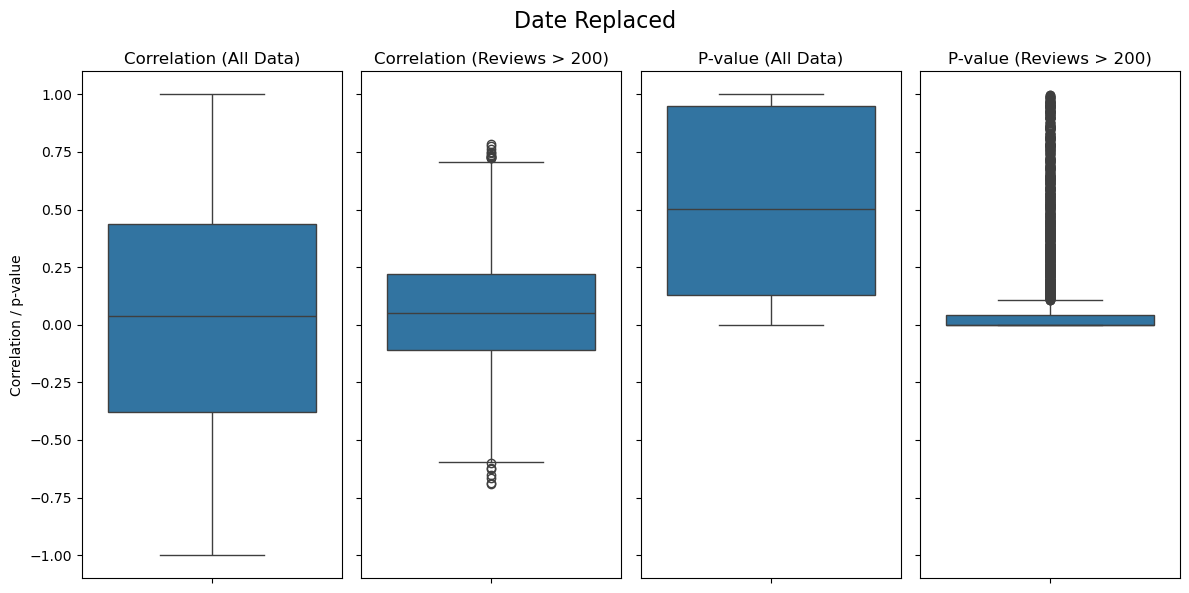

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 

fig.suptitle('Date Replaced', fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date['total_count'] > 200]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (Reviews > 200)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date['total_count'] > 200]['p_value'], ax=axes[3])
axes[3].set_title("P-value (Reviews > 200)")


plt.tight_layout()  
plt.show()

In [32]:
result_rep_date[(result_rep_date['total_count'] > 20) & (result_rep_date['total_count'] < 500)]['correlation'].mean()

0.04595073995303983

In [33]:
result_rep_date['correlation'].mean()

0.023548083373233167

In [34]:
rev_of_exp = review_of_experts(rev_with_scores_rb, users, user_id='user_name', nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, user_id='user_name', max=100)


rev_exp_std = standardize(rev_of_exp, scores_for_beer.reset_index(), exp_categories)
result_rep_date = rev_exp_std.groupby('user_name').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


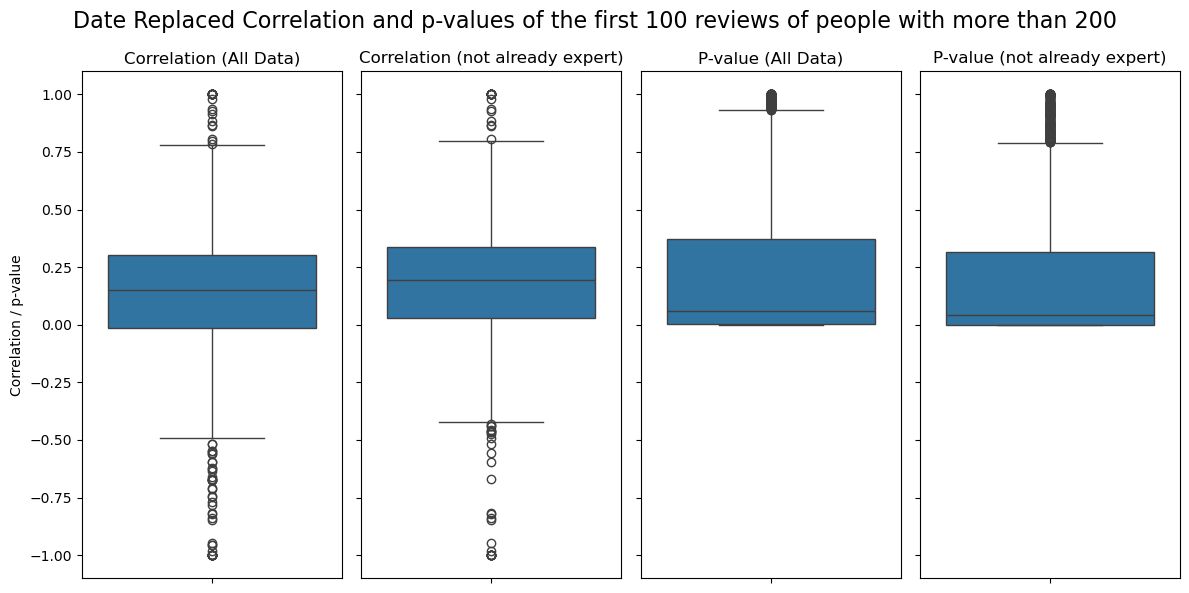

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True) 


fig.suptitle("Date Replaced Correlation and p-values of the first 100 reviews of people with more than 200", fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['p_value'], ax=axes[3])
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [36]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].correlation.mean()

0.1827389347232627

In [37]:
result_rep_date.correlation.mean()

0.14044120241350472

In [38]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].p_value.describe()

count    2.493000e+03
mean     2.017383e-01
std      2.890836e-01
min      6.860383e-24
25%      6.510233e-04
50%      4.104249e-02
75%      3.168128e-01
max      1.000000e+00
Name: p_value, dtype: float64

## Avg user evolution

In [30]:
nbr_rev=150 #minimun nuber of reviews of a user for the following analysis  

In [31]:
rev_exp_std = standardize_min_max(rev_with_scores_rb, exp_categories, by_style=True) 

Text(0.5, 1.0, 'Mean of the score (standardized) of the first 5 reviews of people with more than 150')

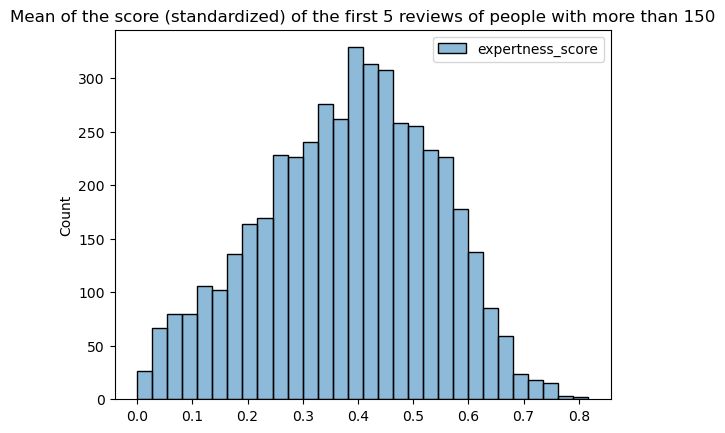

In [32]:
rev_of_exp = review_of_experts(rev_exp_std, users, user_id='user_name', nbr_rev=nbr_rev)
first_rev_of_exp = first_reviews(rev_of_exp, user_id='user_name', max=5)
rev_exp_std_grouped = first_rev_of_exp.groupby('user_name')[['expertness_score']].agg('mean')
sns.histplot(rev_exp_std_grouped, color='hls')
plt.title('Mean of the score (standardized) of the first 5 reviews of people with more than %d' %(nbr_rev))

In [33]:
threshold = rev_exp_std_grouped['expertness_score'].quantile(0.2)

no_already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score'] < threshold].index
len(no_already_experts)

921

In [34]:
threshold = rev_exp_std_grouped['expertness_score'].quantile(0.8)

already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score'] > threshold].index
len(already_experts)

921

In [35]:
sel_rev_of_exp = first_reviews(rev_of_exp, user_id='user_name', max=50)
result_rep_date = sel_rev_of_exp.groupby('user_name').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

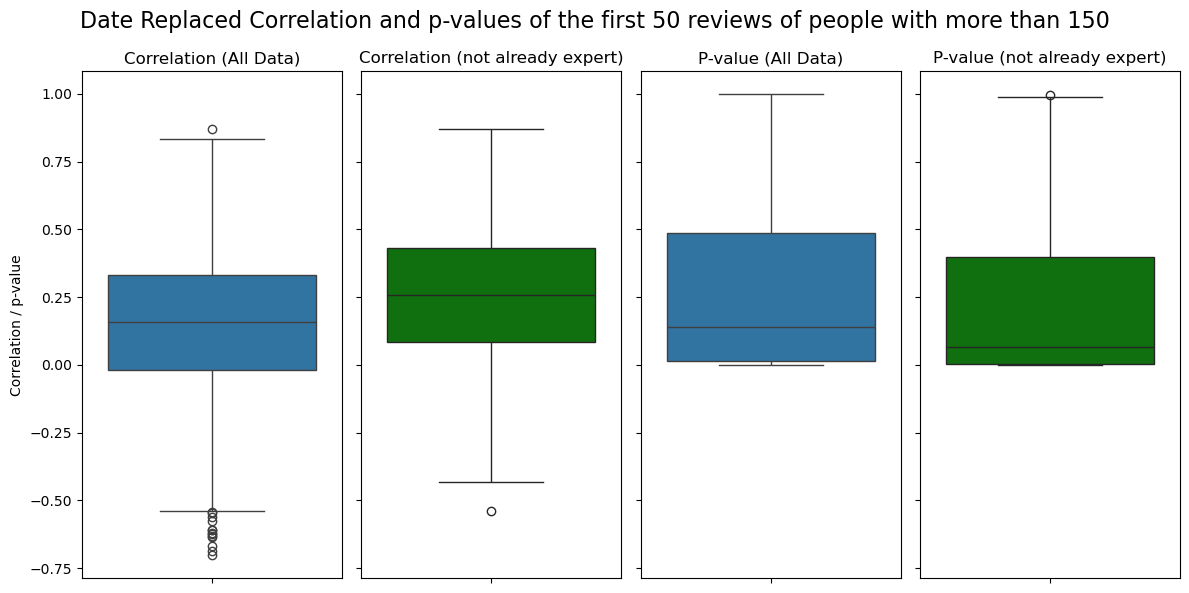

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True) 

fig.suptitle("Date Replaced Correlation and p-values of the first 50 reviews of people with more than %d" %(nbr_rev), fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['correlation'], ax=axes[1], color = 'green')
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['p_value'], ax=axes[3], color = 'green')
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [37]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].correlation.median()

0.25705270087770893

In [38]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].p_value.describe()

count    9.190000e+02
mean     2.204674e-01
std      2.872674e-01
min      1.939429e-16
25%      1.744409e-03
50%      6.515893e-02
75%      3.964331e-01
max      9.959836e-01
Name: p_value, dtype: float64

In [39]:
rev_of_exp = review_of_experts(rev_exp_std, users, user_id='user_name', nbr_rev=nbr_rev)
first_rev_of_exp = first_reviews(rev_of_exp, user_id='user_name', max=nbr_rev)

In [40]:
rev_no_al_exp = first_rev_of_exp[first_rev_of_exp.user_name.isin(no_already_experts)]
rev_no_al_exp = rev_no_al_exp.sort_values(by=['user_name', 'date'])

# Create incremental numbers for each user
rev_no_al_exp['rev_nbr'] = rev_no_al_exp.groupby('user_name').cumcount() 

In [41]:
col_to_keep = ['rev_nbr']+ exp_categories
avg_no_al_exp = rev_no_al_exp[col_to_keep].groupby('rev_nbr').agg(['mean', ('sem', lambda x: x.sem())])


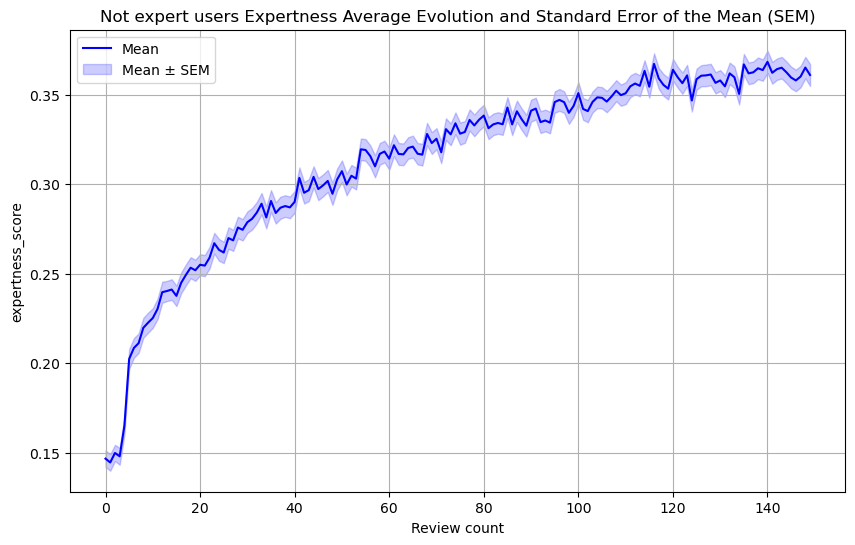

In [42]:
# Plot mean and SEM
plt.figure(figsize=(10, 6))

# Plot the mean
plt.plot(avg_no_al_exp.index, avg_no_al_exp['expertness_score']['mean'], label='Mean', color='blue')

# Plot the SEM as a shaded area
plt.fill_between(
    avg_no_al_exp.index,
    avg_no_al_exp['expertness_score']['mean'] - avg_no_al_exp['expertness_score']['sem'],
    avg_no_al_exp['expertness_score']['mean'] + avg_no_al_exp['expertness_score']['sem'],
    color='blue',
    alpha=0.2,
    label='Mean ± SEM'
)

# Formatting the plot
plt.title('Not expert users Expertness Average Evolution and Standard Error of the Mean (SEM)')
plt.xlabel('Review count')
plt.ylabel('expertness_score')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Effect of log normalization

Text(0.5, 1.0, 'Score (raw)')

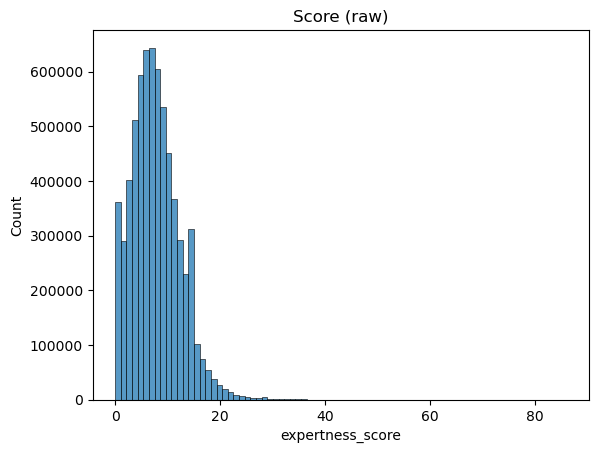

In [43]:
sns.histplot(rev_with_scores_rb.expertness_score, bins = 80)
plt.title('Score (raw)')

Text(0.5, 1.0, 'Score (standardized)')

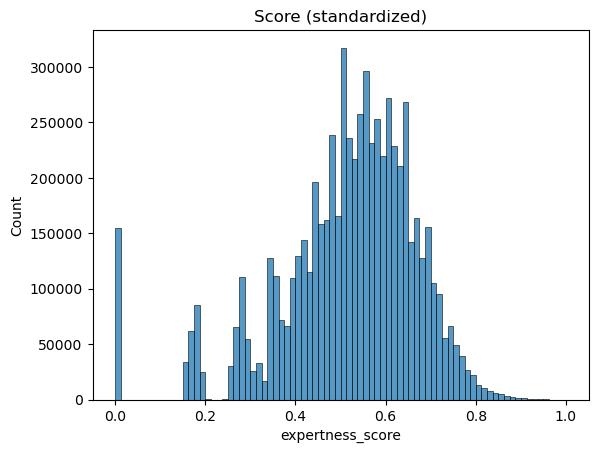

In [44]:
sns.histplot(rev_exp_std.expertness_score, bins = 80)
plt.title('Score (standardized)')

# Plot for everyone

In [45]:
nbr_rev=1000
rev = review_of_experts(rev_exp_std, users, nbr_rev=5)
first_rev = first_reviews(rev, max=5)
rev_std_grouped = first_rev.groupby('user_id')[['expertness_score']].agg('mean')

Text(0.5, 1.0, 'Mean of the score (standardized) of the first 5 reviews')

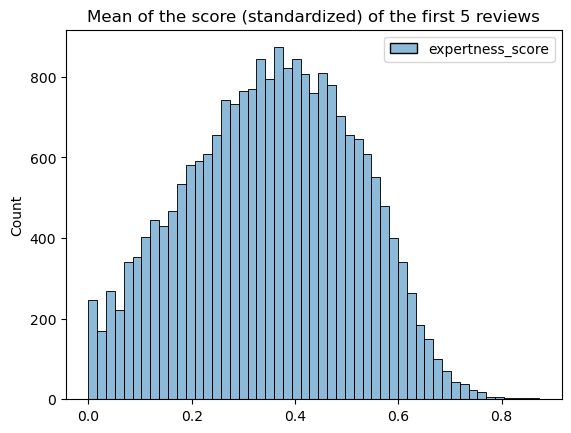

In [46]:
sns.histplot(rev_std_grouped, color='hls')
plt.title('Mean of the score (standardized) of the first 5 reviews')

In [47]:
exp_levels={}
threshold_20 = rev_std_grouped['expertness_score'].quantile(0.2)
exp_levels['Bottom 20%'] = rev_std_grouped[rev_std_grouped['expertness_score'] < threshold_20].index

threshold_80 = rev_std_grouped['expertness_score'].quantile(0.8)
exp_levels['Top 20%'] = rev_std_grouped[rev_std_grouped['expertness_score'] >= threshold_80].index

exp_levels['20-80%'] = rev_std_grouped[
    (rev_std_grouped['expertness_score'] >= threshold_20) & 
    (rev_std_grouped['expertness_score'] < threshold_80)
].index


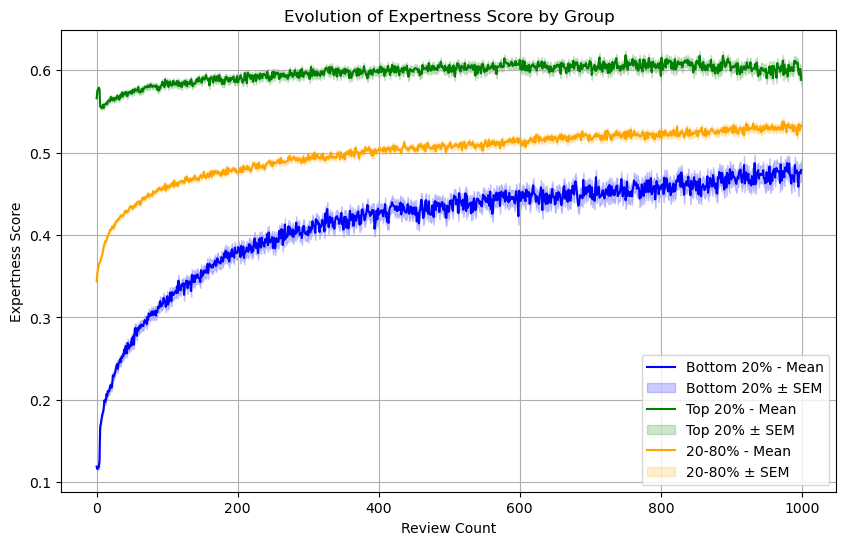

In [48]:
first_rev = first_reviews(rev, max=nbr_rev)

# Define the colors for each group
colors = {
    'Bottom 20%': 'blue',
    'Top 20%': 'green',
    '20-80%': 'orange'
}

# Initialize a single plot
plt.figure(figsize=(10, 6))

# Loop through each expertise group and calculate stats
for key, value in exp_levels.items():
    # Filter reviews for the current group
    rev_no_al_exp = first_rev[first_rev.user_id.isin(value)]
    rev_no_al_exp = rev_no_al_exp.sort_values(by=['user_id', 'date'])

    # Create incremental review numbers for each user
    rev_no_al_exp['rev_nbr'] = rev_no_al_exp.groupby('user_id').cumcount()

    # Drop unnecessary columns
    rev_no_al_exp = rev_no_al_exp.drop(columns=['date'])
    col_to_keep = ['rev_nbr'] + exp_categories

    # Group by review number and calculate mean and SEM
    avg_no_al_exp = rev_no_al_exp[col_to_keep].groupby('rev_nbr').agg(['mean', ('sem', lambda x: x.sem())])

    # Plot the mean line
    plt.plot(
        avg_no_al_exp.index,
        avg_no_al_exp['expertness_score']['mean'],
        label=f"{key} - Mean",
        color=colors[key]
    )

    # Plot the SEM as a shaded area
    plt.fill_between(
        avg_no_al_exp.index,
        avg_no_al_exp['expertness_score']['mean'] - avg_no_al_exp['expertness_score']['sem'],
        avg_no_al_exp['expertness_score']['mean'] + avg_no_al_exp['expertness_score']['sem'],
        color=colors[key],
        alpha=0.2,
        label=f"{key} ± SEM"
    )

# Formatting the plot
plt.title('Evolution of Expertness Score by Group')
plt.xlabel('Review Count')
plt.ylabel('Expertness Score')
plt.legend()
plt.grid(True)

# Show the combined plot
plt.show()



# Evolution per category

In [49]:
first_rev = first_reviews(rev, max=nbr_rev)

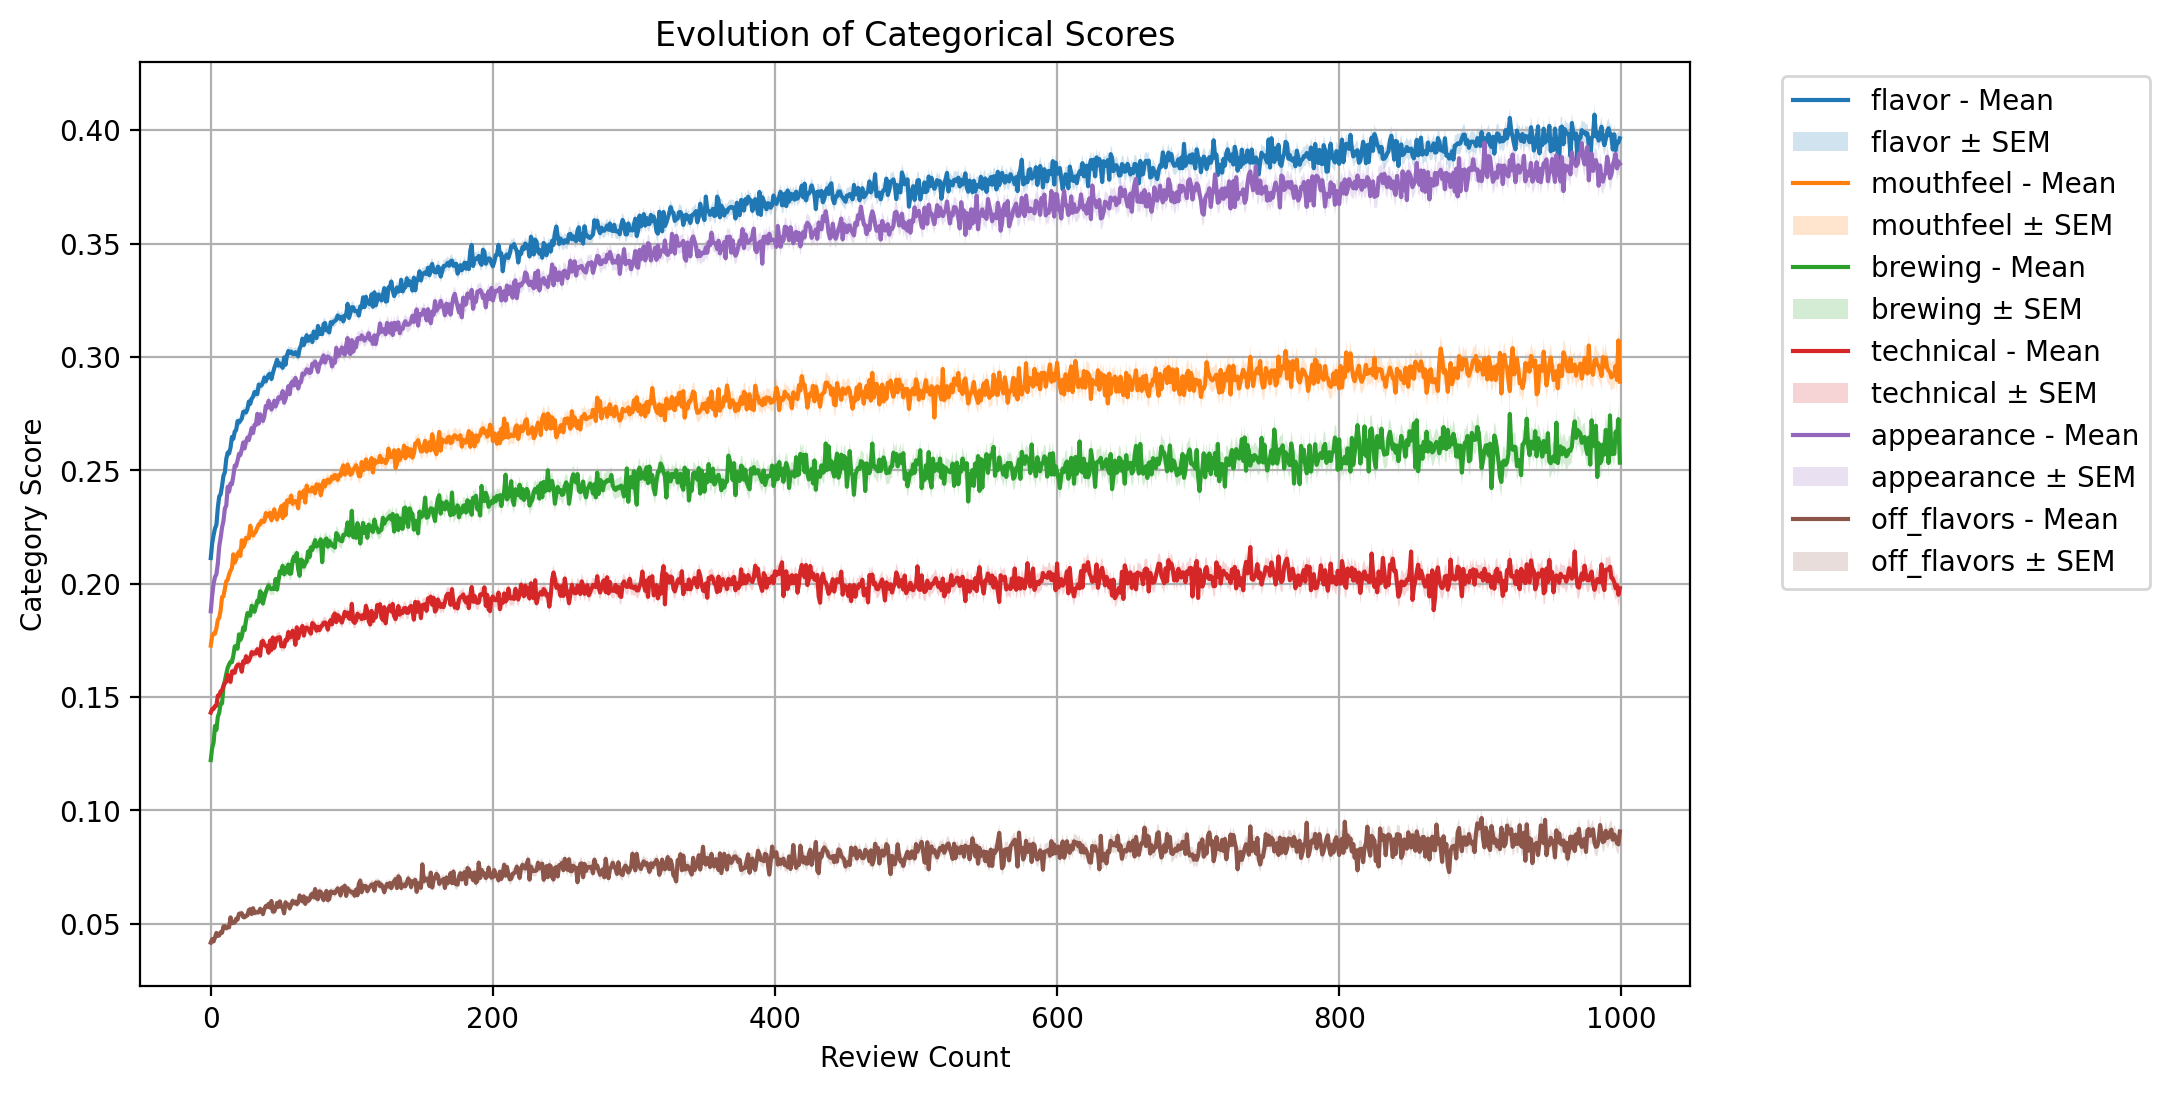

In [50]:
# Initialize a single plot
plt.figure(figsize=(10, 6), dpi=200)

# Loop through each expertise group and calculate stats
for key in exp_categories:
    if key=='expertness_score':
        continue
    # Filter reviews for the current group
    rev_no_al_exp = first_rev.sort_values(by=['user_id', 'date'])

    # Create incremental review numbers for each user
    rev_no_al_exp['rev_nbr'] = rev_no_al_exp.groupby('user_id').cumcount()

    # Drop unnecessary columns
    rev_no_al_exp = rev_no_al_exp.drop(columns=['date'])
    col_to_keep = ['rev_nbr'] + exp_categories

    # Group by review number and calculate mean and SEM
    avg_no_al_exp = rev_no_al_exp[col_to_keep].groupby('rev_nbr').agg(['mean', ('sem', lambda x: x.sem())])

    # Plot the mean line
    plt.plot(
        avg_no_al_exp.index,
        avg_no_al_exp[key]['mean'],
        label=f"{key} - Mean",
    )

    # Plot the SEM as a shaded area
    plt.fill_between(
        avg_no_al_exp.index,
        avg_no_al_exp[key]['mean'] - avg_no_al_exp[key]['sem'],
        avg_no_al_exp[key]['mean'] + avg_no_al_exp[key]['sem'],
        alpha=0.2,
        label=f"{key} ± SEM"
    )

# Formatting the plot
plt.title(f"Evolution of Categorical Scores")
plt.xlabel('Review Count')
plt.ylabel('Category Score')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)

# Show the combined plot
plt.show()



# English and non English countries / expert and non expert

In [52]:
complete_exp_rev = pd.merge(first_rev, users[['user_name', 'location']], on='user_name')
complete_exp_rev = complete_exp_rev.sort_values(by=['user_name', 'date'])

# Create incremental numbers for each user
complete_exp_rev['rev_nbr'] = complete_exp_rev.groupby('user_name').cumcount() 
complete_exp_rev['location'] = complete_exp_rev['location'].str.replace(r'United States, .*', 'United States', regex=True)

In [53]:
#no_eng_countries = ['Italy', 'Spain', 'Germany', 'France', 'Poland', 'Belgium', 'Estonia', 'Austria', 'Croatia', 'Hungary', 'Switzerland']

eng_countries = ['United States','Scotland', 'Ireland', 'England', 'Northern Ireland', 'Australia', 'Canada']

In [55]:
print(len(complete_exp_rev[~complete_exp_rev['location'].isin(eng_countries)& complete_exp_rev['user_id'].isin(exp_levels['Top 20%'])])/nbr_rev)
print(len(complete_exp_rev[complete_exp_rev['location'].isin(eng_countries) & complete_exp_rev['user_id'].isin(exp_levels['Top 20%'])])/nbr_rev)
print(len(complete_exp_rev[~complete_exp_rev['location'].isin(eng_countries)& complete_exp_rev['user_id'].isin(exp_levels['Bottom 20%'])])/nbr_rev)
print(len(complete_exp_rev[complete_exp_rev['location'].isin(eng_countries) & complete_exp_rev['user_id'].isin(exp_levels['Bottom 20%'])])/nbr_rev)

246.65
518.71
123.93
370.491


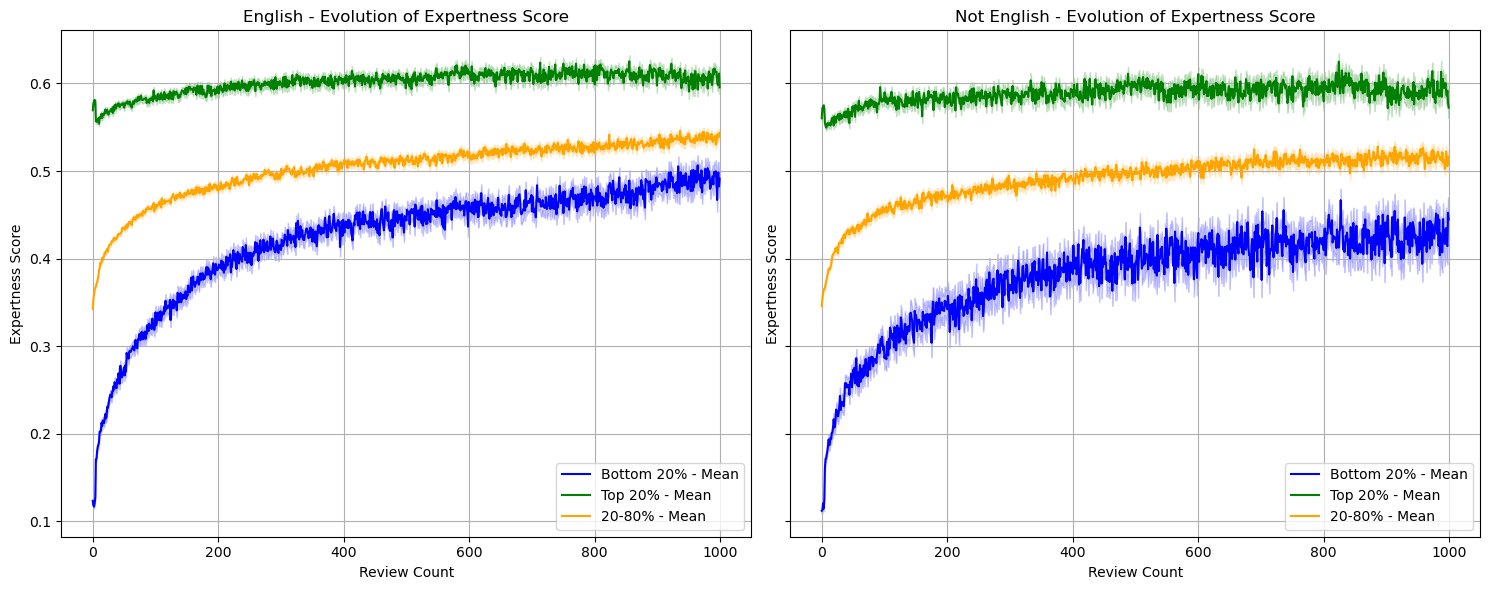

In [56]:
# Define the colors for each expertise group
colors = {
    'Bottom 20%': 'blue',
    'Top 20%': 'green',
    '20-80%': 'orange'
}

# Define country groups: English-speaking vs Non-English-speaking
countries = {
    'English': complete_exp_rev['location'].isin(eng_countries),
    'Not English': ~complete_exp_rev['location'].isin(eng_countries)
}

# Create a figure with subplots: 1 row per country group, 1 plot per group
fig, axes = plt.subplots(nrows=1, ncols=len(countries), figsize=(15, 6), sharey=True)

# Flatten axes if there's more than one row
if len(countries) == 1:
    axes = [axes]

# Iterate through each country group (English / Not English)
for ax, (country_key, country_filter) in zip(axes, countries.items()):
    # Iterate through expertise levels
    for exp_key, exp_value in exp_levels.items():
        # Filter reviews for the current expertise group and country
        rev_filtered = complete_exp_rev[
            complete_exp_rev['user_id'].isin(exp_value) &
            (country_filter)
        ]

        rev_filtered = rev_filtered.sort_values(by=['user_id', 'date'])

        # Create incremental review numbers for each user
        rev_filtered['rev_nbr'] = rev_filtered.groupby('user_id').cumcount()

        # Drop unnecessary columns
        rev_filtered = rev_filtered.drop(columns=['date'])
        col_to_keep = ['rev_nbr'] + exp_categories

        # Group by review number and calculate mean and SEM
        avg_stats = rev_filtered[col_to_keep].groupby('rev_nbr').agg(['mean', ('sem', lambda x: x.sem())])

        # Plot the mean line
        ax.plot(
            avg_stats.index,
            avg_stats['expertness_score']['mean'],
            label=f"{exp_key} - Mean",
            color=colors[exp_key]
        )

        # Plot the SEM as a shaded area
        ax.fill_between(
            avg_stats.index,
            avg_stats['expertness_score']['mean'] - avg_stats['expertness_score']['sem'],
            avg_stats['expertness_score']['mean'] + avg_stats['expertness_score']['sem'],
            color=colors[exp_key],
            alpha=0.2
        )

    # Formatting for each subplot
    ax.set_title(f"{country_key} - Evolution of Expertness Score")
    ax.set_xlabel('Review Count')
    ax.set_ylabel('Expertness Score')
    ax.legend()
    ax.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
